# Starting to explore eqcorrscan

## Started off by making a quakeml file for a small subset of the Endeavour catalog

Following the tutorial at this link to start:

https://eqcorrscan.readthedocs.io/en/latest/tutorials/quick_start.html

In [1]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from eqcorrscan.utils.catalog_utils import filter_picks

### Read in the quakeml file

In [2]:
# Round trip
from obspy.core.event import read_events
cat = read_events('endquakes_june2017.xml')
cat[0].origins[0].arrivals
pick_id = cat[0].picks[0].resource_id
arrivals = cat[0].origins[0].arrivals
arr = [a for a in arrivals if a.pick_id==pick_id]
arr[0]

Arrival
	   resource_id: ResourceIdentifier(id="quakeml:/Assoc/NV/515094p1")
	       pick_id: ResourceIdentifier(id="quakeml:/Arrival/NV/515094p1")
	         phase: 'P'
	 time_residual: 0.0001
	   time_weight: 1.0

In [10]:
# Add in a phase hint to the picks
for event in cat.events:
    for pick in event.picks:
        pick_id = pick.resource_id
        arr = [a for a in event.origins[0].arrivals if a.pick_id==pick_id]
        pick.phase_hint=arr[0].phase

In [8]:
cat_filt = cat.filter("time > 2019-07-05T10:21",
                  "time < 2019-07-05T10:22")

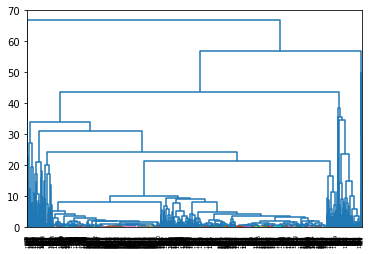

In [26]:
from eqcorrscan.utils.clustering import catalog_cluster
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS")
groups = catalog_cluster(
    catalog=cat, metric="distance", thresh=0.5, show=True)

In [23]:
from eqcorrscan.utils.clustering import space_time_cluster
groups = space_time_cluster(catalog=cat, t_thresh=3600, d_thresh=0.5)

In [24]:
lengths = []
for group in groups:
    lengths.append(len(group))

In [25]:
max(lengths)

18

## It runs! But what is this warning I'm getting?

#### For pulling specific channels - set swin in Tribe().construct() to P_all and S_all


In [4]:
from eqcorrscan import Tribe
client = Client("IRIS")
# Barrett got best performance with process_len=1 hour



tribe = Tribe().construct(
    method="from_client", lowcut=5.0, highcut=20.0, samp_rate=200.0, length=3.0,
    filt_order=4, prepick=0.25, client_id=client, catalog=cat, data_pad=20.,
    process_len=3600, min_snr=3.0, parallel=True,swin='all')

# Can also specify parallel=True and num_cores

print(tribe)

Signal-to-noise ratio 2.3829581223492164 below threshold for ENWF.HHZ, not using
No pick for NV.ENWF..HHZ
Signal-to-noise ratio 1.4192759308086806 below threshold for ENWF.HHE, not using
No pick for NV.ENWF..HHE
Signal-to-noise ratio 1.1946571846917264 below threshold for ENWF.HHZ, not using
No pick for NV.ENWF..HHZ
Signal-to-noise ratio 2.03170335038912 below threshold for KEMF.EHE, not using
No pick for NV.KEMF..EHE
Signal-to-noise ratio 1.343748470627363 below threshold for KEMO.EHE, not using
No pick for NV.KEMO..EHE
Signal-to-noise ratio 1.9992627792598094 below threshold for NCHR.EHE, not using
No pick for NV.NCHR..EHE
Signal-to-noise ratio 1.3484415537311694 below threshold for NCHR.EHZ, not using
No pick for NV.NCHR..EHZ
Signal-to-noise ratio 1.7110829378720782 below threshold for ENWF.HHE, not using
No pick for NV.ENWF..HHE
Signal-to-noise ratio 1.3322552430439456 below threshold for ENWF.HHZ, not using
No pick for NV.ENWF..HHZ
Signal-to-noise ratio 2.4699379770985987 below th

Exception: Can't merge traces with same ids but differing sampling rates!

In [ ]:
## Looks like they're all being cut on S

Template 2016_07_01t09_04_32: 
	 5 channels;
	 lowcut: 5.0 Hz;
	 highcut: 20.0 Hz;
	 sampling rate 200.0 Hz;
	 filter order: 4; 
	 process length: 3600.0 s


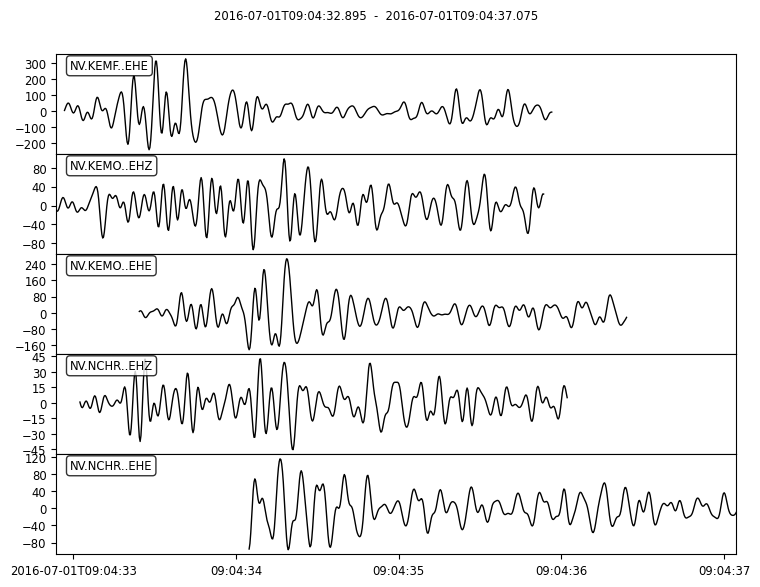

In [41]:
print(tribe[2])
fig = tribe[2].st.plot(equal_scale=False, size=(800, 600))

Template 2016_07_01t09_04_32: 
	 5 channels;
	 lowcut: 5.0 Hz;
	 highcut: 20.0 Hz;
	 sampling rate 200.0 Hz;
	 filter order: 4; 
	 process length: 3600.0 s


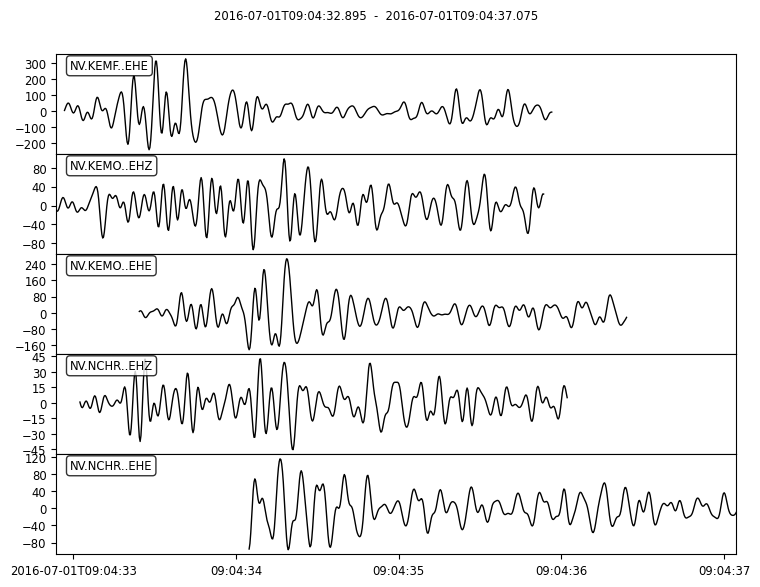

In [31]:
print(tribe[2])
fig = tribe[2].st.plot(equal_scale=False, size=(800, 600))

In [25]:
tribe[0].__dict__.keys()

dict_keys(['name', 'st', 'lowcut', 'highcut', 'samp_rate', 'filt_order', 'process_length', 'prepick', 'event'])

#### Think about renaming to event ID

In [29]:
tribe[0].name

'2016_07_01t06_07_03'